# Infer natal territories

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
import xyzservices.providers as xyz
import ipywidgets as widgets

%run _helpers.py

%matplotlib widget
sns.set_theme()
pd.set_option('display.max_rows', 80)
idx = pd.IndexSlice

gdf_clean = gpd.read_parquet('../data/processed/clean.parquet')
print(f"loaded {gdf_clean.shape[0]} datapoints")
print(f"cutoff date: {gdf_clean.iloc[-1:].index.get_level_values(1).date[0]}")

loaded 1124388 datapoints
cutoff date: 2025-01-13


In [2]:
gdf_population = gpd.read_parquet('../data/processed/subset_territorial_season.parquet')
gdf_night = gpd.read_parquet('../data/processed/subset_cohorts_juvenile_nights_timeshifted.parquet')
gdf_natal_candidates = gpd.read_parquet('../data/processed/areas_natal_territory_candidates.parquet')

## Best candidates

In [3]:
gdf_natal_candidates.loc[idx[:,1],:]

,,year,npoints,ndays,cooccur,geometry
ind,rank,,,,,
G294,1,2020,24,16,3,"POLYGON ((601292.999 1127364.924, 601249.318 1..."
G295,1,2020,297,66,1,"POLYGON ((599772.471 1125687.511, 599732.213 1..."
G296,1,2020,184,29,1,"POLYGON ((602123.191 1128309.862, 602097.491 1..."
G297,1,2020,279,92,1,"POLYGON ((597258.287 1125727.66, 597253.023 11..."
G298,1,2020,53,11,1,"POLYGON ((602220.958 1123519.849, 602228.04 11..."
G340,1,2020,35,7,3,"POLYGON ((601269.393 1127366.191, 601265.35 11..."
G427,1,2021,68,8,7,"POLYGON ((604238.054 1128378.437, 604222.744 1..."
G434,1,2021,20,4,1,"POLYGON ((601978.074 1127240.98, 601955.547 11..."
G444,1,2021,104,22,6,"POLYGON ((604045.774 1128700.689, 604028.019 1..."


In [4]:
gdf_natal_candidates.loc[idx[:,1],:].reset_index().explore(column='year', cmap=cc.cm.glasbey_dark, tiles=xyz.CartoDB.Voyager, categorical=True)

## Explore single individual

In [5]:
w_ind = widgets.Dropdown(options=gdf_natal_candidates.index.levels[0].to_list())
w_ind

Dropdown(options=('G294', 'G295', 'G296', 'G297', 'G298', 'G340', 'G427', 'G434', 'G444', 'G454', 'G467', 'G47…

### show clusters and night positions

Colormap shows number of elapsed days since first equipped.

,,year,npoints,ndays,cooccur,geometry
ind,rank,,,,,
G294,1,2020,24,16,3,"POLYGON ((601292.999 1127364.924, 601249.318 1..."


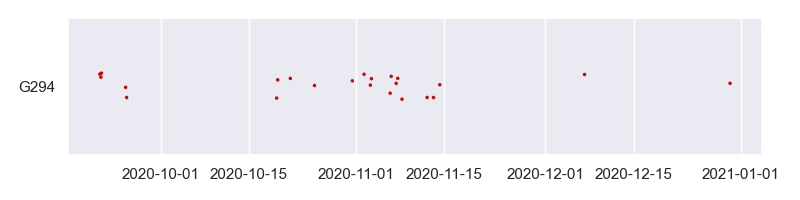

In [6]:
ind = w_ind.value

gdf_areas = gdf_natal_candidates.loc[idx[ind,:],:]
gdf_ind = gdf_night.loc[idx[ind,:],:]
cohort = gdf_areas.year.iloc[0]
gdf_x = gdf_ind.sjoin(gdf_areas, how='left', lsuffix=None)

display(gdf_areas)

fig, axes = plt.subplot_mosaic('A', figsize=(8,2))
sns.stripplot(gdf_x, x='ts', y='ind', hue=gdf_x['rank'], palette=cc.glasbey_dark[:gdf_x['rank'].nunique()], dodge=True, legend=False, marker='.', ax=axes['A'])
axes['A'].set_xlabel(None)
axes['A'].set_ylabel(None)
fig.tight_layout()
plt.show()

m = gdf_areas.reset_index().explore(column='rank', cmap=cc.cm.glasbey_dark, categorical=True, tiles=xyz.CartoDB.Voyager)
equipped = gdf_ind.index.get_level_values(1).min()
d = (gdf_ind.index.get_level_values(1) - equipped).days
gdf_ind.reset_index().explore(column=d, cmap='cet_gouldian', m=m)

### show full juvenile data (1st year of life)

Positions are color-coded:
- blue: day
- orange: twilight 
- black: night

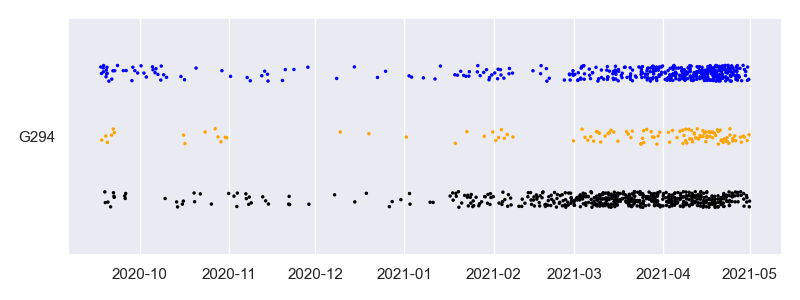

In [7]:
ind = w_ind.value

gdf = gdf_clean.loc[idx[ind,:],:]
gdf = gdf.loc[gdf.age == 0.]

fig, axes = plt.subplot_mosaic('A', figsize=(8,3))
sns.stripplot(gdf, x='ts', y='ind', hue='sunpos', palette={'day':'blue', 'twilight':'orange', 'night':'black'}, dodge=True, legend=False, marker='.', ax=axes['A'])
axes['A'].set_xlabel(None)
axes['A'].set_ylabel(None)
fig.tight_layout()
plt.show()

m = gdf_areas.reset_index().explore(column='rank', cmap=cc.cm.glasbey_dark, categorical=True, legend=False, tiles=xyz.CartoDB.Voyager)
_expl(gdf, m=m)

### show co-occurrence on each cluster

ind
G294    26
G295     4
G340    26
Name: coocur, dtype: int64

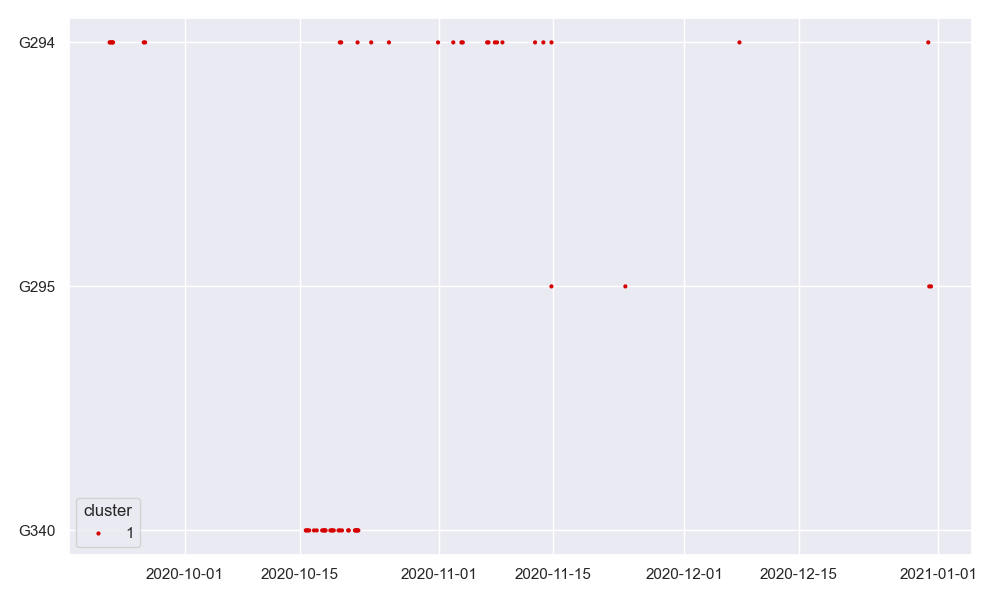

In [8]:
ind = w_ind.value

gdf_areas = gdf_natal_candidates.loc[idx[ind,:],:]
gdf = gdf_population.loc[gdf_population.index.get_level_values(1).year == cohort]
gdf = gdf.sjoin(gdf_areas).rename_axis(['ind','ts'])

display(gdf.groupby(level=0).lat.count().rename('coocur'))

fig, axes = plt.subplot_mosaic('A', figsize=(10,6))
sns.scatterplot(gdf, x='ts', y='ind', marker='.', hue=gdf['rank'], palette=cc.glasbey_dark[:gdf['rank'].nunique()], linewidth=0., ax=axes['A'])
axes['A'].get_legend().set_title('cluster')
axes['A'].set_xlabel(None)
axes['A'].set_ylabel(None)
fig.tight_layout()
plt.show()

In [9]:
ind = w_ind.value

m = gdf_areas.reset_index().explore(column='rank', cmap=cc.cm.glasbey_dark, categorical=True, legend=False, tiles=xyz.CartoDB.Voyager)
gdf.loc[gdf.index.get_level_values(0) != gdf_areas.index.get_level_values(0)[0]].reset_index().explore(column='ind', cmap=cc.cm.glasbey_cool, m=m)

## Distribution of results

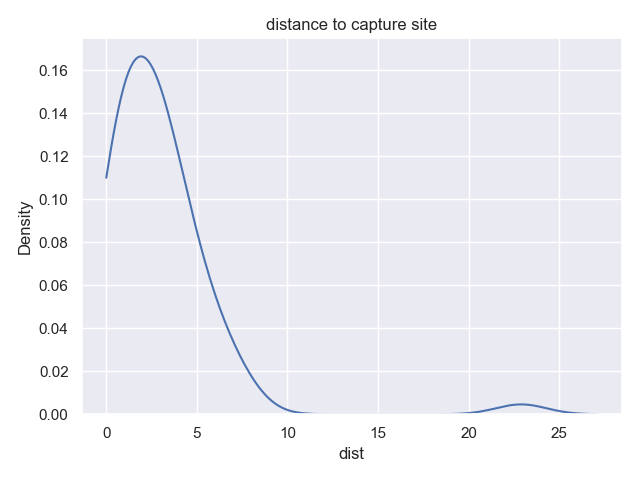

,year,long,lat,dist
ind,,,,
G294,2020,2.353770,48.847030,596.317350
G295,2020,2.333291,48.832051,2389.649623
G296,2020,2.365649,48.855606,1290.237606
G297,2020,2.299512,48.832649,4633.315838
G298,2020,2.367458,48.812616,3469.330561
G340,2020,2.353921,48.847006,593.270266
G427,2021,2.394600,48.856354,2767.467672
G434,2021,2.363521,48.845833,250.731803
G444,2021,2.391748,48.859455,2773.523917


In [10]:
from shapely import Point

gdf_prediction = gdf_natal_candidates.loc[idx[:,1],:].droplevel(1)

gdf_capture_site = gpd.GeoSeries(data=Point(2.3611, 48.8440), crs='epsg:4326').to_crs(gdf_natal_candidates.crs)
df_dist =  gdf_prediction.apply(lambda x: x.geometry.distance(gdf_capture_site.iloc[0]), axis=1).rename('dist')
df_latlong = gdf_prediction.centroid.to_crs('epsg:4326').get_coordinates().rename(columns={'x':'long', 'y':'lat'})

df_view = pd.concat([gdf_prediction[['year']], df_latlong, df_dist], axis=1)

fig, ax = plt.subplots()
sns.kdeplot(df_view, x=df_view.dist/1000., bw_adjust=1., clip=[0,None])
ax.set_title('distance to capture site')
fig.tight_layout()
plt.show()

df_view
